importing important libraries

In [1]:
import networkx as nx                                                  
import matplotlib.pyplot as plt
import networkx.algorithms.community as nx_comm
import random
import numpy as np
from itertools import accumulate

reading the data set with nx.read_edgelist() function

In [2]:
G=nx.read_edgelist('email-Eu-core.txt')
print(nx.info(G))

Graph with 1005 nodes and 16706 edges


C:\Users\Arijit Kundu\AppData\Local\Temp\ipykernel_14316\2284331274.py:2: DeprecationWarning: info is deprecated and will be removed in version 3.0.

  print(nx.info(G))


A copy of the graph is created and using nx_comm.louvain_communities(H) we get the communities in the Graph and it returns a set so we store it inside community_set

In [3]:
H=nx.Graph(G)
community_set = nx_comm.louvain_communities(H)
print("there is ",len(community_set),"communities in Facebook Dataset")
print(community_set)

there is  28 communities in Facebook Dataset
[{'440', '824', '907', '843', '401', '916', '493', '556', '992', '231', '584', '575', '290', '835', '568', '581', '214', '458', '936', '198', '178', '813', '567', '789', '276', '910', '645', '817', '486', '522', '706', '836', '205', '206', '278', '349', '603', '593', '874', '965', '352', '705', '291', '689', '734', '348', '342', '284', '449', '14', '53', '128', '347', '425', '814', '450', '149', '714', '697', '563', '909', '200', '611', '207', '122', '677', '621', '797', '262', '688', '605', '199', '917', '572', '600', '402', '751', '918', '790', '779', '974', '515', '903', '562', '850', '129', '197', '289', '414', '277', '148', '413', '191', '939', '694', '479', '280', '426', '403', '829', '776', '292', '511', '203', '851', '870', '202', '345', '623', '180', '802', '257', '840', '270', '557', '415', '51', '871', '534', '65', '692', '873', '176', '232', '275', '172', '343', '183', '544', '204', '346', '526', '940', '201', '681', '350', '168'

here the list of set is converted into list of list and it is converted into list of list

In [4]:
community_list = []
for j in community_set:
    community_list.append(list(j))
print(community_list)

[['440', '824', '907', '843', '401', '916', '493', '556', '992', '231', '584', '575', '290', '835', '568', '581', '214', '458', '936', '198', '178', '813', '567', '789', '276', '910', '645', '817', '486', '522', '706', '836', '205', '206', '278', '349', '603', '593', '874', '965', '352', '705', '291', '689', '734', '348', '342', '284', '449', '14', '53', '128', '347', '425', '814', '450', '149', '714', '697', '563', '909', '200', '611', '207', '122', '677', '621', '797', '262', '688', '605', '199', '917', '572', '600', '402', '751', '918', '790', '779', '974', '515', '903', '562', '850', '129', '197', '289', '414', '277', '148', '413', '191', '939', '694', '479', '280', '426', '403', '829', '776', '292', '511', '203', '851', '870', '202', '345', '623', '180', '802', '257', '840', '270', '557', '415', '51', '871', '534', '65', '692', '873', '176', '232', '275', '172', '343', '183', '544', '204', '346', '526', '940', '201', '681', '350', '168', '998', '484', '542', '41', '846', '95', '86

K shell function is made to find out the community cores! cores at the end of the list are cores with higher degrees

In [5]:
def check(H,d):
    f = 0 
    for j in H:
        if (H.degree(j) <= d):
            f = 1
            break
    return f
  
def find_nodes(H, it):
    set1 = []
    for j in H:
        if (H.degree(j) <= it):
            set1.append(j)
    return set1
  
def k_shell(H):  
    it = 1
    tmp = []
    buckets = []
    while (1):
        flag = check(H, it)
        if (flag == 0):
            it += 1
            buckets.append(tmp)
            tmp = []
        if (flag == 1):
            node_set = find_nodes(H, it)
            for each in node_set:
                copy_graph.remove_node(each)
                tmp.append(each)
        if (H.number_of_nodes() == 0):
            buckets.append(tmp)
            return buckets
            break
               

here k-shell is applied and the community list of list is stored into list_core

In [6]:
copy_graph = nx.Graph(H)
list_core = []
k_com = nx.Graph()
other_com = nx.Graph()
for i in community_list:
    k_com = copy_graph.subgraph(i)
    k_core=k_shell(k_com)
    list_core.append((k_core))
print(list_core)

[[['824', '916', '910', '603', '965', '449', '677', '688', '790', '779', '850', '871', '940', '998', '861', '740', '938'], ['843', '584', '692', '873', '801'], ['992', '522', '874', '814', '903', '939', '870', '415', '846', '682', '605'], ['567', '689', '348', '909', '479', '829', '802', '534', '574', '749', '852', '414', '697'], ['645', '836', '797', '402', '1000', '791', '970'], ['556', '835', '734', '751', '974', '694', '576', '789'], ['276', '817', '706', '705', '289', '202', '664', '623'], ['511', '557', '523', '656'], ['585', '156', '955'], ['907', '575', '581', '563', '600', '148', '270', '349', '611', '851', '344', '262', '347'], ['621', '544', '484', '149'], ['122'], ['840', '681', '822'], ['572', '403', '399', '813', '350', '542', '345', '343', '352', '191'], ['936', '53', '714', '277', '346', '425'], ['401', '178', '257', '457', '543', '568', '291', '562', '180', '294', '458', '284', '130', '275', '351', '278', '483'], ['290', '214', '413', '176', '292', '493', '486', '515',

storing the cores with Higher degree in a list called k_core_list and also the lengths of the cores are stored inside leng list

In [7]:
k_core_list = []
leng=[];
for i in list_core:
    length = len(i)-1
    k_core_list.append(i[length])       

for i in k_core_list:
    leng.append(len(i))

print(k_core_list)    
print(leng)

[['207', '197', '776', '198', '593', '917', '918', '51', '908', '94', '206', '128', '200', '199', '204', '201', '41', '95', '196', '820', '167'], ['312', '301', '248', '307', '310', '317', '311', '177', '226', '459', '268', '85', '73', '225', '1', '316', '313', '18', '314', '222', '223', '17', '215', '309', '218', '221', '0', '74'], ['521', '598', '554', '553', '482', '134'], ['381', '179', '388', '380', '378', '385', '397', '150', '296', '387', '389', '320', '395', '393', '103', '321', '295', '377', '390', '379', '250', '157', '394', '60', '181', '61', '376', '182', '368', '104'], ['580'], ['136', '337', '25', '133', '245', '370', '318', '263', '47', '36', '37', '171', '33', '48', '26', '34', '409', '93', '24', '437', '135', '38', '338', '367', '169', '39', '31', '32', '13', '251', '455', '443', '114', '113', '361', '96', '417', '438', '116', '151', '27', '29', '23', '165', '40', '115', '28', '170', '261', '35', '30', '339'], ['633'], ['648'], ['653'], ['658'], ['660'], ['670'], ['675

Defining a H_index function that returns H index of any list

In [8]:
def H_index(citations):
    citations.sort()
    for index, cited in enumerate(citations):
        result = len(citations) - index
        if result <= cited:
            return result
    return 0

defining a function that can return the H_index of any node's neighbours list's H_index

In [9]:
def Node_H_index(node):
    neig_list=G.neighbors(node)
    degree_list=[]
    for neighbour in neig_list:
        degree_list.append(G.degree(neighbour))
    h_index = H_index(degree_list)
    return h_index

defing a functiion that can return the Extended_h_index of a node

In [10]:
def Extended_H_index(node):
    h_index = Node_H_index(node)
    h_sum = 0
    for n in G.neighbors(node):
        h_sum = h_sum + Node_H_index(n)
    return h_index + h_sum

K core lists in every community and their extended H index

In [11]:
extended_list = []
new_extended_list=[]
rev_list=[]

for i in k_core_list:
    length=len(i)
    for j in i:
        extended_list.append(Extended_H_index(j))
print("K core list:",k_core_list)        
print("List of Extended H_index of cores:", extended_list )
new_extended_list = [extended_list[x - y: x] for x, y in zip(accumulate(leng), leng)]
print("Extended H_index of core_list:",new_extended_list)
print("Length of the cores in core_list:",leng)

K core list: [['207', '197', '776', '198', '593', '917', '918', '51', '908', '94', '206', '128', '200', '199', '204', '201', '41', '95', '196', '820', '167'], ['312', '301', '248', '307', '310', '317', '311', '177', '226', '459', '268', '85', '73', '225', '1', '316', '313', '18', '314', '222', '223', '17', '215', '309', '218', '221', '0', '74'], ['521', '598', '554', '553', '482', '134'], ['381', '179', '388', '380', '378', '385', '397', '150', '296', '387', '389', '320', '395', '393', '103', '321', '295', '377', '390', '379', '250', '157', '394', '60', '181', '61', '376', '182', '368', '104'], ['580'], ['136', '337', '25', '133', '245', '370', '318', '263', '47', '36', '37', '171', '33', '48', '26', '34', '409', '93', '24', '437', '135', '38', '338', '367', '169', '39', '31', '32', '13', '251', '455', '443', '114', '113', '361', '96', '417', '438', '116', '151', '27', '29', '23', '165', '40', '115', '28', '170', '261', '35', '30', '339'], ['633'], ['648'], ['653'], ['658'], ['660'], [

Finding out max Extended h index values of the nodes and their indexes 

In [12]:
max_extended_h_index=[]
index_list=[]
for i in new_extended_list:
    max_extended_h_index.append(max(i))
    index_list.append(i.index(max(i)))

print("Maximum extended h indexes:",max_extended_h_index)
print("Their index value:",index_list)

Maximum extended h indexes: [6961, 4998, 1754, 4488, 2, 6888, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 12699, 2, 2, 3917, 6718, 4525]
Their index value: [11, 21, 4, 17, 0, 32, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 43, 0, 0, 14, 27, 35]


Finally using the indexes we find out the cores

In [13]:
seed=[]
for x,y in zip(k_core_list,index_list):
    seed.append(x[y])
print(seed)

['128', '17', '482', '377', '580', '114', '633', '648', '653', '658', '660', '670', '675', '684', '691', '703', '711', '731', '732', '744', '746', '772', '160', '798', '808', '269', '211', '44']


Coppying the cores in a new list for safety

In [14]:
copy_seeds=[]
copy_seeds=seed.copy()
print(copy_seeds)
print(len(copy_seeds))

['128', '17', '482', '377', '580', '114', '633', '648', '653', '658', '660', '670', '675', '684', '691', '703', '711', '731', '732', '744', '746', '772', '160', '798', '808', '269', '211', '44']
28


all the seed nodes in decending order of Extended H index with their Extended H index values

In [15]:
my_dict={copy_seeds[i]: max_extended_h_index[i] for i in range(len(copy_seeds))}
# print(my_dict)
# print(my_dict.values())
sorted_dict={k: v for k,v in sorted(my_dict.items(), key = lambda v:v[1], reverse = True)}
print(sorted_dict)

{'160': 12699, '128': 6961, '114': 6888, '211': 6718, '17': 4998, '44': 4525, '377': 4488, '269': 3917, '482': 1754, '580': 2, '633': 2, '648': 2, '653': 2, '658': 2, '660': 2, '670': 2, '675': 2, '684': 2, '691': 2, '703': 2, '711': 2, '731': 2, '732': 2, '744': 2, '746': 2, '772': 2, '798': 2, '808': 2}


Independent Cascade Model Function

In [16]:
def ic(G, s, act_prbo):    
    jst_inf = s
    infected = s
    
    while(1):
        
        if len(jst_inf)==0:
            return infected
        else:
            temp=[]
            for each in jst_inf:
                for each1 in G.neighbors(each):
                    r=random.uniform(0,1)
                    if r<act_prbo and each1 not in infected and each1 not in temp:
                        temp.append(each1)
            for each1 in temp:
                infected.append(each1)
            jst_inf=temp

neighbours of the seed node is found

In [17]:
print("Seed nodes",copy_seeds)
seed_neighbour_list=[]
for i in copy_seeds:
    neighbour_list = [n for n in H.neighbors(i)]
    seed_neighbour_list.append(neighbour_list)
print(seed_neighbour_list)

Seed nodes ['128', '17', '482', '377', '580', '114', '633', '648', '653', '658', '660', '670', '675', '684', '691', '703', '711', '731', '732', '744', '746', '772', '160', '798', '808', '269', '211', '44']
[['1', '3', '5', '6', '11', '13', '14', '15', '16', '21', '23', '27', '28', '30', '35', '36', '41', '42', '44', '46', '51', '52', '53', '62', '63', '64', '79', '80', '81', '82', '83', '86', '87', '93', '94', '95', '105', '106', '107', '114', '115', '116', '118', '121', '127', '199', '434', '205', '197', '133', '196', '128', '495', '129', '474', '593', '371', '494', '212', '667', '249', '165', '256', '143', '167', '355', '283', '365', '207', '526', '215', '155', '172', '378', '166', '160', '200', '254', '201', '405', '409', '340', '169', '367', '226', '300', '450', '346', '363', '206', '280', '820', '218', '362', '183', '751', '333', '157', '220', '278', '533', '214', '327', '486', '377', '198', '290', '576', '420', '424', '419', '204', '388', '209', '557', '892', '343', '210', '306',

All the nodes are added in a single list,duplicate nodes are taken as single nodes

In [18]:
node_n_list=[]
for i in seed_neighbour_list:
    for j in i:
        
        node_n_list.append(j)
final_set=((set)(node_n_list))
final_list=list(final_set)
print(final_list)

['580', '729', '496', '764', '362', '653', '539', '4', '699', '726', '63', '198', '288', '377', '105', '234', '302', '205', '206', '163', '86', '208', '332', '932', '145', '85', '394', '300', '90', '16', '956', '338', '53', '174', '78', '406', '444', '12', '152', '765', '91', '551', '924', '900', '207', '738', '122', '675', '842', '209', '222', '262', '503', '46', '917', '92', '18', '327', '686', '211', '974', '308', '518', '240', '446', '529', '422', '506', '442', '148', '293', '490', '62', '322', '5', '690', '159', '195', '906', '162', '43', '341', '717', '880', '776', '365', '951', '292', '59', '387', '851', '369', '461', '23', '56', '983', '658', '391', '559', '326', '684', '194', '419', '142', '598', '471', '462', '638', '25', '882', '65', '232', '275', '358', '343', '569', '8', '228', '589', '201', '484', '10', '555', '95', '679', '64', '28', '812', '525', '392', '565', '818', '271', '210', '130', '164', '156', '820', '251', '799', '89', '582', '676', '379', '447', '374', '443', 

Candidate solution is found by deleting seed node's neighbours and adding it with seed nodes

In [19]:
Node_list=H.nodes()
rest_list=Node_list-final_list
candidate_solution=list(rest_list)+copy_seeds
candidate_solution = set(candidate_solution)
# print(candidate_solution)
candidate_solution = list(candidate_solution)
# print(candidate_solution)
print("Nodes left after deleting seed node's neighbours:",candidate_solution)
print("Core number:",len(candidate_solution))

Nodes left after deleting seed node's neighbours: ['580', '916', '556', '653', '823', '584', '972', '878', '813', '377', '700', '987', '651', '914', '904', '910', '881', '522', '750', '603', '757', '874', '794', '991', '439', '449', '624', '259', '372', '510', '814', '825', '540', '75', '758', '675', '631', '538', '211', '945', '779', '954', '515', '850', '639', '22', '260', '968', '888', '937', '934', '989', '647', '561', '897', '613', '674', '838', '952', '436', '517', '975', '902', '202', '658', '684', '759', '995', '415', '416', '739', '905', '768', '996', '668', '803', '762', '901', '773', '727', '912', '545', '831', '662', '998', '722', '652', '796', '124', '752', '931', '585', '574', '969', '743', '787', '958', '801', '476', '884', '704', '1001', '618', '962', '911', '824', '843', '33', '178', '590', '763', '800', '806', '789', '645', '627', '834', '836', '898', '516', '774', '876', '771', '883', '944', '425', '463', '697', '421', '935', '677', '688', '926', '269', '790', '325',

First 10 among 16 seed nodes are taken

In [20]:
decending_seed_list=list(sorted_dict.keys())
adjustList = decending_seed_list.copy()
print(adjustList)
print(len(adjustList))
print(adjustList [0:10])

['160', '128', '114', '211', '17', '44', '377', '269', '482', '580', '633', '648', '653', '658', '660', '670', '675', '684', '691', '703', '711', '731', '732', '744', '746', '772', '798', '808']
28
['160', '128', '114', '211', '17', '44', '377', '269', '482', '580']


Final Calculation is done here,
For first 10 nodes, 10 nodes are taken from 16 seed nodes
For first 20 nodes, 16 from seed and rest from the highest Extended H index list and run ic model 20 times and avg is found
For first 30 nodes, 16 from seed and rest from the highest Extended H index list and run ic model 20 times and avg is found
For first 40 nodes, 16 from seed and rest from the highest Extended H index list and run ic model 20 times and avg is found
For first 50 nodes, 16 from seed and rest from the highest Extended H index list and run ic model 20 times and avg is found

In [21]:
def final_calculation(K):
    adjustList = decending_seed_list.copy()
    if K < len(community_list):
        decending_list = adjustList[0:K]
        print("Best ",len(decending_list)," are: ", decending_list)

        lenList=[]
        tempList=[]

        for i in range(20):
            tempList= ic(H,adjustList,0.5)
            print(i,end="-->")
            lenList.append(len(tempList))
        print("\n",lenList)

        average = sum(lenList)/len(lenList)
        return average
    
    else:
        candidateIndex_list = []
        for i in candidate_solution:
            candidateIndex_list.append(Extended_H_index(i))


        my_dict1={candidate_solution[i]: candidateIndex_list[i] for i in range(len(candidate_solution))}
        candidate_decending={k: v for k,v in sorted(my_dict1.items(), key = lambda v:v[1], reverse = True)}


        rest_nodes=list(candidate_decending.keys())
        temp3 = []
        for element in rest_nodes:
            if element not in adjustList:
                temp3.append(element)

        val = len(adjustList)
        op_list = adjustList + temp3[0 :(K - val)]

        print("Best ",len(op_list)," are: ", op_list)
        len1List=[]
        temp1List=[]

        for i in range(20):
            temp1List= ic(H,adjustList,0.5)
            print(i,end="-->")
            len1List.append(len(temp1List))
        print("\n",len1List)

        average1 = sum(len1List)/len(len1List)
        return average1

a new list is taken and given values 10,20,30,40,50

In [22]:
kList=[]

k1 = 10
k2 = 20
k3 = 30
k4 = 40
k5 = 50

kList.append(k1)
kList.append(k2)
kList.append(k3)
kList.append(k4)
kList.append(k5)

print(kList)

[10, 20, 30, 40, 50]


Final Calculation is Done here

In [23]:
valueList = []

v1 = final_calculation(10)
v2 = final_calculation(20)
v3 = final_calculation(30)
v4 = final_calculation(40)
v5 = final_calculation(50)

valueList.append(v1)
valueList.append(v2)
valueList.append(v3)
valueList.append(v4)
valueList.append(v5)

print(valueList)

Best  10  are:  ['160', '128', '114', '211', '17', '44', '377', '269', '482', '580']
0-->1-->2-->3-->4-->5-->6-->7-->8-->9-->10-->11-->12-->13-->14-->15-->16-->17-->18-->19-->
 [940, 974, 990, 998, 1003, 1005, 1005, 1005, 1005, 1005, 1005, 1005, 1005, 1005, 1005, 1005, 1005, 1005, 1005, 1005]
Best  20  are:  ['160', '128', '114', '211', '17', '44', '377', '269', '482', '580', '633', '648', '653', '658', '660', '670', '675', '684', '691', '703']
0-->1-->2-->3-->4-->5-->6-->7-->8-->9-->10-->11-->12-->13-->14-->15-->16-->17-->18-->19-->
 [936, 976, 993, 1000, 1002, 1004, 1005, 1005, 1005, 1005, 1005, 1005, 1005, 1005, 1005, 1005, 1005, 1005, 1005, 1005]
Best  30  are:  ['160', '128', '114', '211', '17', '44', '377', '269', '482', '580', '633', '648', '653', '658', '660', '670', '675', '684', '691', '703', '711', '731', '732', '744', '746', '772', '798', '808', '357', '31']
0-->1-->2-->3-->4-->5-->6-->7-->8-->9-->10-->11-->12-->13-->14-->15-->16-->17-->18-->19-->
 [939, 982, 995, 1002, 100

In [24]:
# plt.plot(kList,valueList, 'ro-')
# plt.xlabel('Number of Seed Nodes ')
# plt.ylabel('Number of Edge ')
# plt.title('Proposed model Graph')
# plt.show()

highest 50 nodes based on degree is found

In [25]:
#Degree
degreeDict={}
for node in G.nodes():
    degreeDict[node] = G.degree(node)
degree_decending = {k: v for k,v in sorted(degreeDict.items(), key = lambda v:v[1], reverse = True)}
# print(degree_decending)
keysD = []
valD = []
finalDlist = []
for vals in degree_decending.values():
    valD.append(vals)
for keys in degree_decending.keys():
    keysD.append(keys)

def Dcal(K):
    decendingD_list = keysD[0: K]
    print("Best ",len(decendingD_list)," are: ", decendingD_list)
    lenDList=[]
    tempDList=[]
    for i in range(20):
        tempDList= ic(H,decendingD_list,0.5)
        print(i,end="-->")
        lenDList.append(len(tempDList))
    print("\n",lenDList)
    averageD = sum(lenDList)/len(lenDList)
    return averageD

D1 = Dcal(10)
D2 = Dcal(20)
D3 = Dcal(30)
D4 = Dcal(40)
D5 = Dcal(50)

finalDlist.append(D1)
finalDlist.append(D2)
finalDlist.append(D3)
finalDlist.append(D4)
finalDlist.append(D5)


# plt.plot(kList,finalDlist, 'yo-')
# plt.xlabel('Number of Seed Nodes according to degree')
# plt.ylabel('Number of Edges')
# plt.show()

Best  10  are:  ['160', '121', '82', '107', '86', '62', '434', '13', '166', '183']
0-->1-->2-->3-->4-->5-->6-->7-->8-->9-->10-->11-->12-->13-->14-->15-->16-->17-->18-->19-->
 [927, 961, 974, 979, 984, 986, 986, 986, 986, 986, 986, 986, 986, 986, 986, 986, 986, 986, 986, 986]
Best  20  are:  ['160', '121', '82', '107', '86', '62', '434', '13', '166', '183', '5', '64', '249', '129', '533', '211', '105', '128', '106', '114']
0-->1-->2-->3-->4-->5-->6-->7-->8-->9-->10-->11-->12-->13-->14-->15-->16-->17-->18-->19-->
 [927, 960, 970, 977, 982, 984, 985, 986, 986, 986, 986, 986, 986, 986, 986, 986, 986, 986, 986, 986]
Best  30  are:  ['160', '121', '82', '107', '86', '62', '434', '13', '166', '183', '5', '64', '249', '129', '533', '211', '105', '128', '106', '114', '283', '83', '142', '87', '377', '21', '420', '282', '333', '424']
0-->1-->2-->3-->4-->5-->6-->7-->8-->9-->10-->11-->12-->13-->14-->15-->16-->17-->18-->19-->
 [934, 965, 978, 982, 984, 986, 986, 986, 986, 986, 986, 986, 986, 986, 9

highest 50 nodes based on betweenness is found

In [26]:
#betweenness_centrality
betweenDict = nx.betweenness_centrality(G)
decBetweennessDict = {k: v for k,v in sorted(betweenDict.items(), key = lambda v:v[1], reverse = True)}
# print(decBetweennessDict)
keysB = []
valsB = []
finalB_val = []
for i in decBetweennessDict.keys():
    keysB.append(i)
for j in decBetweennessDict.values():
    valsB.append(j)


def BCcal(K):
    decendingBC_list = keysB[0: K]
    print("Best ",len(decendingBC_list)," are: ", decendingBC_list)
    lenBCList=[]
    tempBCList=[]
    for i in range(20):
        tempBCList= ic(H,decendingBC_list,0.5)
        print(i,end="-->")
        lenBCList.append(len(tempBCList))
    print("\n",lenBCList)
    averageBC = sum(lenBCList)/len(lenBCList)
    return averageBC

BC1 = BCcal(10)
BC2 = BCcal(20)
BC3 = BCcal(30)
BC4 = BCcal(40)
BC5 = BCcal(50)

finalB_val.append(BC1)
finalB_val.append(BC2)
finalB_val.append(BC3)
finalB_val.append(BC4)
finalB_val.append(BC5)


# plt.plot(kList,finalB_val, 'bo-')
# plt.xlabel('Number of Seed Nodes according to Betweeness ')
# plt.ylabel('Number of Edges')
# plt.show()

Best  10  are:  ['160', '86', '5', '82', '121', '107', '13', '377', '62', '64']
0-->1-->2-->3-->4-->5-->6-->7-->8-->9-->10-->11-->12-->13-->14-->15-->16-->17-->18-->19-->
 [919, 952, 970, 982, 985, 985, 985, 986, 986, 986, 986, 986, 986, 986, 986, 986, 986, 986, 986, 986]
Best  20  are:  ['160', '86', '5', '82', '121', '107', '13', '377', '62', '64', '211', '533', '84', '166', '971', '434', '411', '129', '65', '6']
0-->1-->2-->3-->4-->5-->6-->7-->8-->9-->10-->11-->12-->13-->14-->15-->16-->17-->18-->19-->
 [924, 967, 982, 984, 986, 986, 986, 986, 986, 986, 986, 986, 986, 986, 986, 986, 986, 986, 986, 986]
Best  30  are:  ['160', '86', '5', '82', '121', '107', '13', '377', '62', '64', '211', '533', '84', '166', '971', '434', '411', '129', '65', '6', '183', '333', '301', '96', '21', '820', '44', '249', '106', '128']
0-->1-->2-->3-->4-->5-->6-->7-->8-->9-->10-->11-->12-->13-->14-->15-->16-->17-->18-->19-->
 [927, 969, 976, 984, 985, 986, 986, 986, 986, 986, 986, 986, 986, 986, 986, 986, 98

highest 50 nodes based on page rank is found

In [27]:
#pagerank_numpy
page_rank = nx.pagerank_numpy(H)
decendingPR = {k: v for k,v in sorted(page_rank.items(), key = lambda v:v[1], reverse = True)}
# print(decendingPG)

keysPR = []
valuesPR = []
for i in decendingPR.keys():
    keysPR.append(i)
for j in decendingPR.values():
    valuesPR.append(j)

finalPR=[]

def PRcal(K):
    decendingPR_list = keysPR[0: K]
    print("Best ",len(decendingPR_list)," are: ", decendingPR_list)
    lenPRList=[]
    tempPRList=[]
    for i in range(20):
        tempPRList= ic(H,decendingPR_list,0.5)
        print(i,end="-->")
        lenPRList.append(len(tempPRList))
    print("\n",lenPRList)
    averagePR = sum(lenPRList)/len(lenPRList)
    return averagePR

PR1 = PRcal(10)
PR2 = PRcal(20)
PR3 = PRcal(30)
PR4 = PRcal(40)
PR5 = PRcal(50)

finalPR.append(PR1)
finalPR.append(PR2)
finalPR.append(PR3)
finalPR.append(PR4)
finalPR.append(PR5)

# plt.plot(kList,finalPR)
# plt.xlabel('Number of Seed Nodes according to Pagerank')
# plt.ylabel('Number of Edges')
# plt.show()

C:\Users\Arijit Kundu\AppData\Local\Temp\ipykernel_14316\3286579759.py:2: DeprecationWarning: networkx.pagerank_numpy is deprecated and will be removed in NetworkX 3.0, use networkx.pagerank instead.
  page_rank = nx.pagerank_numpy(H)
C:\Users\Arijit Kundu\AppData\Local\Programs\Python\Python310\lib\site-packages\networkx\algorithms\link_analysis\pagerank_alg.py:354: FutureWarning: google_matrix will return an np.ndarray instead of a np.matrix in
NetworkX version 3.0.
  M = google_matrix(


Best  10  are:  ['160', '121', '82', '107', '86', '62', '5', '13', '166', '434']
0-->1-->2-->3-->4-->5-->6-->7-->8-->9-->10-->11-->12-->13-->14-->15-->16-->17-->18-->19-->
 [915, 959, 973, 979, 983, 985, 985, 986, 986, 986, 986, 986, 986, 986, 986, 986, 986, 986, 986, 986]
Best  20  are:  ['160', '121', '82', '107', '86', '62', '5', '13', '166', '434', '377', '64', '211', '183', '129', '249', '533', '84', '21', '128']
0-->1-->2-->3-->4-->5-->6-->7-->8-->9-->10-->11-->12-->13-->14-->15-->16-->17-->18-->19-->
 [923, 953, 972, 978, 981, 983, 984, 985, 986, 986, 986, 986, 986, 986, 986, 986, 986, 986, 986, 986]
Best  30  are:  ['160', '121', '82', '107', '86', '62', '5', '13', '166', '434', '377', '64', '211', '183', '129', '249', '533', '84', '21', '128', '106', '283', '105', '114', '87', '420', '333', '83', '142', '282']
0-->1-->2-->3-->4-->5-->6-->7-->8-->9-->10-->11-->12-->13-->14-->15-->16-->17-->18-->19-->
 [917, 960, 969, 981, 984, 985, 986, 986, 986, 986, 986, 986, 986, 986, 986, 9

highest 50 nodes based on H-index is found

In [28]:
#H-index
HindexDegree = {}
decHindexDegree = {}
for nodes in G.nodes():
    HindexDegree[nodes] = Node_H_index(nodes)
# print(ExtendedDegree)
decHindexDegree = {k: v for k,v in sorted(HindexDegree.items(), key = lambda v:v[1], reverse = True)}
# print(decExtended)

keysH = []
valuesH = []
for i in decHindexDegree.keys():
    keysH.append(i)
for j in decHindexDegree.values():
    valuesH.append(j)
finalH=[]

def Hcal(K):
    decHindexDegree = keysH[0: K]
    print("Best ",len(decHindexDegree)," are: ", decHindexDegree)
    lenHList=[]
    tempHList=[]
    for i in range(20):
        tempHList= ic(H,decHindexDegree,0.5)
        print(i,end="-->")
        lenHList.append(len(tempHList))
    print("\n",lenHList)
    averageH = sum(lenHList)/len(lenHList)
    return averageH

H1 = Hcal(10)
H2 = Hcal(20)
H3 = Hcal(30)
H4 = Hcal(40)
H5 = Hcal(50)

finalH.append(H1)
finalH.append(H2)
finalH.append(H3)
finalH.append(H4)
finalH.append(H5)

# plt.plot(kList,finalH)
# plt.xlabel('Number of Seed Nodes according to H index')
# plt.ylabel('Number of Edges')
# plt.show()

Best  10  are:  ['82', '121', '107', '62', '160', '249', '434', '128', '129', '114']
0-->1-->2-->3-->4-->5-->6-->7-->8-->9-->10-->11-->12-->13-->14-->15-->16-->17-->18-->19-->
 [922, 950, 968, 976, 982, 986, 986, 986, 986, 986, 986, 986, 986, 986, 986, 986, 986, 986, 986, 986]
Best  20  are:  ['82', '121', '107', '62', '160', '249', '434', '128', '129', '114', '183', '87', '105', '166', '212', '21', '83', '106', '283', '81']
0-->1-->2-->3-->4-->5-->6-->7-->8-->9-->10-->11-->12-->13-->14-->15-->16-->17-->18-->19-->
 [917, 966, 981, 983, 983, 984, 986, 986, 986, 986, 986, 986, 986, 986, 986, 986, 986, 986, 986, 986]
Best  30  are:  ['82', '121', '107', '62', '160', '249', '434', '128', '129', '114', '183', '87', '105', '166', '212', '21', '83', '106', '283', '81', '86', '142', '169', '256', '115', '211', '333', '64', '405', '282']
0-->1-->2-->3-->4-->5-->6-->7-->8-->9-->10-->11-->12-->13-->14-->15-->16-->17-->18-->19-->
 [921, 959, 971, 980, 981, 982, 983, 986, 986, 986, 986, 986, 986, 9

highest 50 nodes based on Extended H index is found

In [29]:
#Extended H Index
ExtendedHDegree = {}
decExtendedH = {}
for nodes in G.nodes():
    ExtendedHDegree[nodes] = Extended_H_index(nodes)
decExtendedH = {k: v for k,v in sorted(ExtendedHDegree.items(), key = lambda v:v[1], reverse = True)}

keysEH = []
valuesEH = []
for i in decExtendedH.keys():
    keysEH.append(i)
for j in decExtendedH.values():
    valuesEH.append(j)
finalEH=[]

def EHcal(K):
    decExtendedH = keysEH[0: K]
    print("Best ",len(decExtendedH)," are: ", decExtendedH)
    lenEHList=[]
    tempEHList=[]
    for i in range(20):
        tempEHList= ic(H,decExtendedH,0.5)
        print(i,end="-->")
        lenEHList.append(len(tempEHList))
    print("\n",lenEHList)
    averageEH = sum(lenEHList)/len(lenEHList)
    return averageEH

EH1 = EHcal(10)
EH2 = EHcal(20)
EH3 = EHcal(30)
EH4 = EHcal(40)
EH5 = EHcal(50)

finalEH.append(EH1)
finalEH.append(EH2)
finalEH.append(EH3)
finalEH.append(EH4)
finalEH.append(EH5)

# plt.plot(kList,finalEH)
# plt.xlabel('Number of Seed Nodes according to Extended H index')
# plt.ylabel('Number of Edges')
# plt.show()

Best  10  are:  ['160', '121', '82', '107', '62', '434', '86', '249', '183', '166']
0-->1-->2-->3-->4-->5-->6-->7-->8-->9-->10-->11-->12-->13-->14-->15-->16-->17-->18-->19-->
 [922, 960, 973, 977, 982, 982, 983, 985, 986, 986, 986, 986, 986, 986, 986, 986, 986, 986, 986, 986]
Best  20  are:  ['160', '121', '82', '107', '62', '434', '86', '249', '183', '166', '129', '105', '128', '114', '283', '13', '64', '87', '211', '142']
0-->1-->2-->3-->4-->5-->6-->7-->8-->9-->10-->11-->12-->13-->14-->15-->16-->17-->18-->19-->
 [925, 955, 972, 979, 983, 985, 985, 986, 986, 986, 986, 986, 986, 986, 986, 986, 986, 986, 986, 986]
Best  30  are:  ['160', '121', '82', '107', '62', '434', '86', '249', '183', '166', '129', '105', '128', '114', '283', '13', '64', '87', '211', '142', '83', '106', '533', '256', '115', '282', '21', '424', '333', '212']
0-->1-->2-->3-->4-->5-->6-->7-->8-->9-->10-->11-->12-->13-->14-->15-->16-->17-->18-->19-->
 [914, 949, 963, 973, 981, 984, 985, 986, 986, 986, 986, 986, 986, 98

Final graph plotting and Comparing it with all the other methods

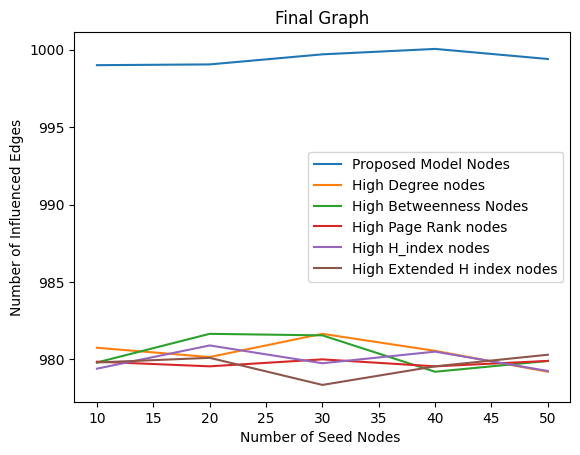

In [30]:
plt.plot(kList,valueList,label='Proposed Model Nodes')
plt.plot(kList,finalDlist, label='High Degree nodes')
plt.plot(kList,finalB_val, label='High Betweenness Nodes')
plt.plot(kList,finalPR, label='High Page Rank nodes')
plt.plot(kList,finalH, label='High H_index nodes')
plt.plot(kList,finalEH, label='High Extended H index nodes')


plt.xlabel('Number of Seed Nodes ')
plt.ylabel('Number of Influenced Edges')
plt.title('Final Graph')
plt.legend()
plt.show()